<a href="https://colab.research.google.com/github/MohammedQaraad/DeepleerningTF/blob/master/simple_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt


In [11]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

celsius_q.shape

(7,)

## Create the model

Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron. 

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)


In [14]:
for i,c in enumerate(celsius_q):
  print('celsius_q  {}  fahrenheit_a  {}'.format(c,fahrenheit_a[i]))

celsius_q  -40.0  fahrenheit_a  -40.0
celsius_q  -10.0  fahrenheit_a  14.0
celsius_q  0.0  fahrenheit_a  32.0
celsius_q  8.0  fahrenheit_a  46.0
celsius_q  15.0  fahrenheit_a  59.0
celsius_q  22.0  fahrenheit_a  72.0
celsius_q  38.0  fahrenheit_a  100.0


In [0]:
la = tf.keras.layers.Dense(units=1 , input_shape=[1])

In [16]:
model = tf.keras.Sequential([la])

Instructions for updating:
Colocations handled automatically by placer.


**Note**

equivelent :
```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

In [17]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(1.0)
             )

Instructions for updating:
Use tf.cast instead.


In [0]:
#input_func=tf.estimator.inputs.numpy_input_fn(x = celsius_q, y = fahrenheit_a, num_epochs=500, shuffle=True)
#model = tf.estimator.LinearClassifier()

In [28]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model
Finished training the model


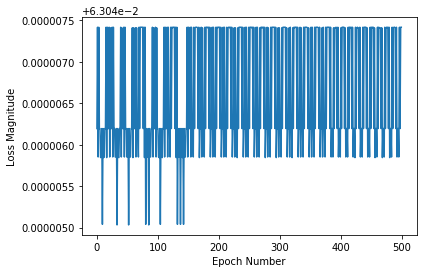

In [30]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [41]:
print(model.predict([100.0]))

[[211.74744]]


In [42]:
print('weights  {}'.format(model.get_weights()))

weights  [array([[1.7979491]], dtype=float32), array([31.952526], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same. 

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [51]:


l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print('l0 weights  {}'.format(l0.get_weights()))
print('l1 weights  {}'.format(l0.get_weights()))
print('l2 weights  {}'.format(l0.get_weights()))


Finished training the model
[[211.74748]]
l0 weights  [array([[ 0.03802594, -0.00691707,  0.03495451, -0.8571518 ]],
      dtype=float32), array([ 2.0408962, -2.10873  ,  2.6360617, -2.7534387], dtype=float32)]
l1 weights  [array([[ 0.03802594, -0.00691707,  0.03495451, -0.8571518 ]],
      dtype=float32), array([ 2.0408962, -2.10873  ,  2.6360617, -2.7534387], dtype=float32)]
l2 weights  [array([[ 0.03802594, -0.00691707,  0.03495451, -0.8571518 ]],
      dtype=float32), array([ 2.0408962, -2.10873  ,  2.6360617, -2.7534387], dtype=float32)]


as you see As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the l0 and l1 layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

Stay tuned for the upcoming video on how Dense layers work for the explanation.